# 1. DATA COLLECTION

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("/Users/vaishnavikhot/Downloads/archive-2/loan_train.csv")
data

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


# 2. DATA PREPROCESSING

## 2a. BASIC EDA

In [2]:
data.shape

(614, 12)

In [3]:
data.size

7368

In [4]:
data.ndim

2

In [5]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area', 'Status'],
      dtype='object')

In [6]:
data.columns[data.isna().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'Term',
       'Credit_History'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [8]:
data.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [11]:
data.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


### REPLACING NaN VALUE WITH MEAN() AND MODE()

In [12]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
gender_mode=data["Gender"].mode()
gender_mode

0    Male
Name: Gender, dtype: object

In [15]:
data["Gender"]=data["Gender"].fillna("Male")
data.columns[data.isna().any()]

Index(['Married', 'Dependents', 'Self_Employed', 'Term', 'Credit_History'], dtype='object')

In [16]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [17]:
data["Dependents"].mode()

0    0
Name: Dependents, dtype: object

In [18]:
data["Dependents"] = data["Dependents"].fillna(0)
data.columns[data.isna().any()]

Index(['Married', 'Self_Employed', 'Term', 'Credit_History'], dtype='object')

In [19]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [21]:
data['Self_Employed']= data['Self_Employed'].fillna("No")
data.columns[data.isna().any()]

Index(['Married', 'Term', 'Credit_History'], dtype='object')

In [22]:
Term_mean = data["Term"].mean()
Term_mean

342.0

In [23]:
data["Term"] = data["Term"].fillna(Term_mean)
data.columns[data.isna().any()]

Index(['Married', 'Credit_History'], dtype='object')

In [24]:
data["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [25]:
data["Married"].mode()


0    Yes
Name: Married, dtype: object

In [26]:
data["Married"] = data["Married"].fillna("Yes")
data.columns[data.isna().any()]

Index(['Credit_History'], dtype='object')

In [27]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [28]:
data["Credit_History"].mode()

0    1.0
Name: Credit_History, dtype: float64

In [29]:
data["Credit_History"] = data["Credit_History"].fillna(1.0)
data.columns[data.isna().any()]

Index([], dtype='object')

In [30]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [31]:
data["Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [32]:
data["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
data["Status"].unique()

array(['Y', 'N'], dtype=object)

## Converting string to numbers

In [34]:
Gender_unique = data['Gender'].unique().tolist()
print(Gender_unique)
Gender_index = np.arange(0,len(Gender_unique)+1,1)
print(Gender_index)
Gender_text_to_num = {i:j for i,j in zip(Gender_unique,Gender_index)}
print(Gender_text_to_num)
Gender_num_to_text ={j:i for j,i in zip(Gender_unique,Gender_index)}
print(Gender_num_to_text)
data['Gender'] = data['Gender'].map(Gender_text_to_num)
data


['Male', 'Female']
[0 1 2]
{'Male': 0, 'Female': 1}
{'Male': 0, 'Female': 1}


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,0,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,0,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,0,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,0,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,0,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,0,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,0,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,0,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [35]:
Married_unique = data['Married'].unique().tolist()
print(Married_unique)
Married_index = np.arange(0,len(Married_unique)+1,1)
print(Married_index)
Married_text_to_num = {i:j for i,j in zip(Married_unique,Married_index)}
print(Married_text_to_num)
Married_num_to_text ={j:i for j,i in zip(Married_unique,Married_index)}
print(Married_num_to_text)
data['Married'] = data['Married'].map(Married_text_to_num)
data


['No', 'Yes']
[0 1 2]
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,0,0,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,0,1,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,0,1,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,0,1,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,0,0,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,0,1,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,0,1,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,0,1,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [36]:
Education_unique = data['Education'].unique().tolist()
print(Education_unique)
Education_index = np.arange(0,len(Education_unique)+1,1)
print(Education_index)
Education_text_to_num = {i:j for i,j in zip(Education_unique,Education_index)}
print(Education_text_to_num)
Education_num_to_text ={j:i for j,i in zip(Education_unique,Education_index)}
print(Education_num_to_text)
data['Education'] = data['Education'].map(Education_text_to_num)
data


['Graduate', 'Not Graduate']
[0 1 2]
{'Graduate': 0, 'Not Graduate': 1}
{'Graduate': 0, 'Not Graduate': 1}


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,0,0,0,0,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,0,1,1,0,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,0,1,0,0,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,0,1,0,1,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,0,0,0,0,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,0,1,3+,0,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,0,1,1,0,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,0,1,2,0,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [37]:
Self_Employed_unique = data['Self_Employed'].unique().tolist()
print(Self_Employed_unique)
Self_Employed_index = np.arange(0,len(Self_Employed_unique)+1,1)
print(Self_Employed_index)
Self_Employed_text_to_num = {i:j for i,j in zip(Self_Employed_unique,Self_Employed_index)}
print(Self_Employed_text_to_num)
Self_Employed_num_to_text ={j:i for j,i in zip(Self_Employed_unique,Self_Employed_index)}
print(Self_Employed_num_to_text)
data['Self_Employed'] = data['Self_Employed'].map(Self_Employed_text_to_num)
data


['No', 'Yes']
[0 1 2]
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,0,0,0,0,0,584900,0.0,15000000,360.0,1.0,Urban,Y
1,0,1,1,0,0,458300,150800.0,12800000,360.0,1.0,Rural,N
2,0,1,0,0,1,300000,0.0,6600000,360.0,1.0,Urban,Y
3,0,1,0,1,0,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,0,0,0,0,0,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,290000,0.0,7100000,360.0,1.0,Rural,Y
610,0,1,3+,0,0,410600,0.0,4000000,180.0,1.0,Rural,Y
611,0,1,1,0,0,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,0,1,2,0,0,758300,0.0,18700000,360.0,1.0,Urban,Y


In [38]:
Area_unique = data['Area'].unique().tolist()
print(Area_unique)
Area_index = np.arange(0,len(Area_unique)+1,1)
print(Area_index)
Area_text_to_num = {i:j for i,j in zip(Area_unique,Area_index)}
print(Area_text_to_num)
Area_num_to_text ={j:i for j,i in zip(Area_unique,Area_index)}
print(Area_num_to_text)
data['Area'] = data['Area'].map(Area_text_to_num)
data


['Urban', 'Rural', 'Semiurban']
[0 1 2 3]
{'Urban': 0, 'Rural': 1, 'Semiurban': 2}
{'Urban': 0, 'Rural': 1, 'Semiurban': 2}


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,0,0,0,0,0,584900,0.0,15000000,360.0,1.0,0,Y
1,0,1,1,0,0,458300,150800.0,12800000,360.0,1.0,1,N
2,0,1,0,0,1,300000,0.0,6600000,360.0,1.0,0,Y
3,0,1,0,1,0,258300,235800.0,12000000,360.0,1.0,0,Y
4,0,0,0,0,0,600000,0.0,14100000,360.0,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,290000,0.0,7100000,360.0,1.0,1,Y
610,0,1,3+,0,0,410600,0.0,4000000,180.0,1.0,1,Y
611,0,1,1,0,0,807200,24000.0,25300000,360.0,1.0,0,Y
612,0,1,2,0,0,758300,0.0,18700000,360.0,1.0,0,Y


In [39]:

data

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,0,0,0,0,0,584900,0.0,15000000,360.0,1.0,0,Y
1,0,1,1,0,0,458300,150800.0,12800000,360.0,1.0,1,N
2,0,1,0,0,1,300000,0.0,6600000,360.0,1.0,0,Y
3,0,1,0,1,0,258300,235800.0,12000000,360.0,1.0,0,Y
4,0,0,0,0,0,600000,0.0,14100000,360.0,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,290000,0.0,7100000,360.0,1.0,1,Y
610,0,1,3+,0,0,410600,0.0,4000000,180.0,1.0,1,Y
611,0,1,1,0,0,807200,24000.0,25300000,360.0,1.0,0,Y
612,0,1,2,0,0,758300,0.0,18700000,360.0,1.0,0,Y


In [40]:
Dependents_unique = data['Dependents'].unique().tolist()
print(Dependents_unique)
Dependents_index = np.arange(0,len(Dependents_unique)+1,1)
print(Dependents_index)
Dependents_text_to_num = {i:j for i,j in zip(Dependents_unique,Dependents_index)}
print(Dependents_text_to_num)
Dependents_num_to_text ={j:i for j,i in zip(Dependents_unique,Dependents_index)}
print(Dependents_num_to_text)
data['Dependents'] = data['Dependents'].map(Dependents_text_to_num)
data


['0', '1', '2', '3+', 0]
[0 1 2 3 4 5]
{'0': 0, '1': 1, '2': 2, '3+': 3, 0: 4}
{'0': 0, '1': 1, '2': 2, '3+': 3, 0: 4}


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,0,0,0,0,0,584900,0.0,15000000,360.0,1.0,0,Y
1,0,1,1,0,0,458300,150800.0,12800000,360.0,1.0,1,N
2,0,1,0,0,1,300000,0.0,6600000,360.0,1.0,0,Y
3,0,1,0,1,0,258300,235800.0,12000000,360.0,1.0,0,Y
4,0,0,0,0,0,600000,0.0,14100000,360.0,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,290000,0.0,7100000,360.0,1.0,1,Y
610,0,1,3,0,0,410600,0.0,4000000,180.0,1.0,1,Y
611,0,1,1,0,0,807200,24000.0,25300000,360.0,1.0,0,Y
612,0,1,2,0,0,758300,0.0,18700000,360.0,1.0,0,Y


In [41]:
import numpy as np
Status_unique = data['Status'].unique().tolist()
print(Status_unique)
Status_index = np.arange(0,len(Status_unique)+1,1)
print(Status_index)
Status_text_to_num = {i:j for i,j in zip(Status_unique,Status_index)}
print(Status_text_to_num)
Status_num_to_text ={j:i for j,i in zip(Status_unique,Status_index)}
print(Status_num_to_text)
data['Status'] = data['Status'].map(Status_text_to_num)
data

['Y', 'N']
[0 1 2]
{'Y': 0, 'N': 1}
{'Y': 0, 'N': 1}


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,0,0,0,0,0,584900,0.0,15000000,360.0,1.0,0,0
1,0,1,1,0,0,458300,150800.0,12800000,360.0,1.0,1,1
2,0,1,0,0,1,300000,0.0,6600000,360.0,1.0,0,0
3,0,1,0,1,0,258300,235800.0,12000000,360.0,1.0,0,0
4,0,0,0,0,0,600000,0.0,14100000,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,290000,0.0,7100000,360.0,1.0,1,0
610,0,1,3,0,0,410600,0.0,4000000,180.0,1.0,1,0
611,0,1,1,0,0,807200,24000.0,25300000,360.0,1.0,0,0
612,0,1,2,0,0,758300,0.0,18700000,360.0,1.0,0,0




## 2b. ADVANCE EDA

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LINEPLOT

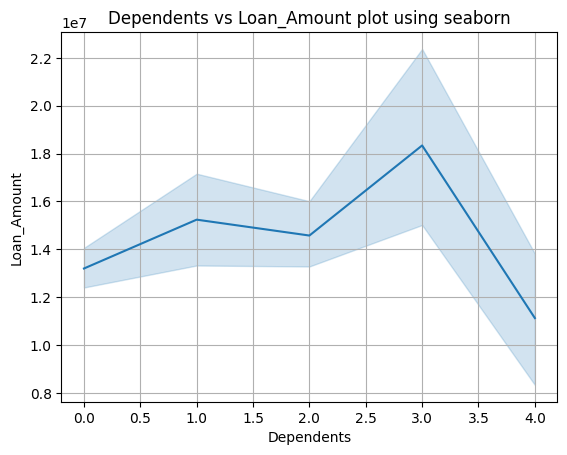

In [43]:
sns.lineplot(x='Dependents',y='Loan_Amount',data=data)#ploting
plt.title("Dependents vs Loan_Amount plot using seaborn")
plt.grid() #displaying 

* The lowest value of **Dependents** is 0.0 and highest value is 4.0 and the range lies from 0.0 to 4.0.
* The lowest value of **Loan_Amount** is 8000000 and highest value is 22000000 and the range lies from 8000000 to 2200000.
* The lowest value of this line plot is 11000000 and peak value is 18000000.


<Axes: xlabel='Area', ylabel='Applicant_Income'>

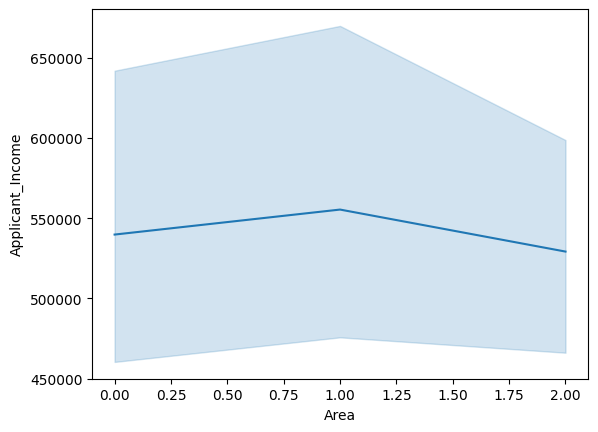

In [42]:
sns.lineplot(x='Area',y='Applicant_Income',data=data)#ploting

* The lowest value of **Area** is 0.00 and highest value is 2.00 and the range lies from 0.00 to 2.00.
* The lowest income of **Applicant_Income** is 475000 and highest income is 650000 and the range lies from 475000 to 650000.
* The lowest value of this line plot is 530000 and peak value is 560000.


### STRIPPLOT

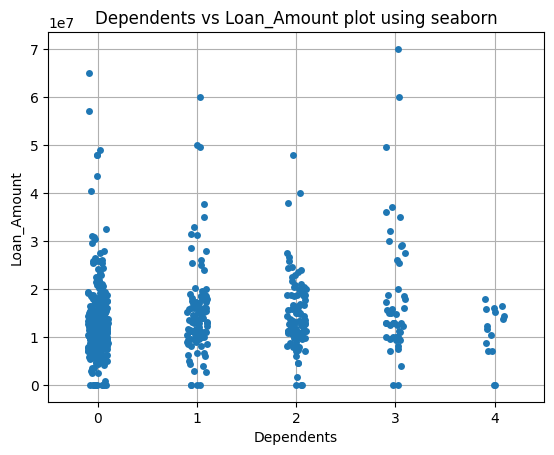

In [42]:
sns.stripplot(x='Dependents',y='Loan_Amount',data=data)#ploting
plt.title("Dependents vs Loan_Amount plot using seaborn")
plt.grid() #displaying 

* **0** has a range from 0 to 32000000 and has greater spread then 4 and has 6 outliers
* **1** has a range from 0 to 39000000 and has greater spread then 4 and has 3 outliers
* **2** has a range from 0 to 29000000 and has greater spread then 4 and has 3 outliers
* **3** has a range from 0 to 38000000 and has greater spread then 4 and has 3 outliers
* **4** has a range from 7500000 to 19000000 andhas smaller spread and has 1 outliers

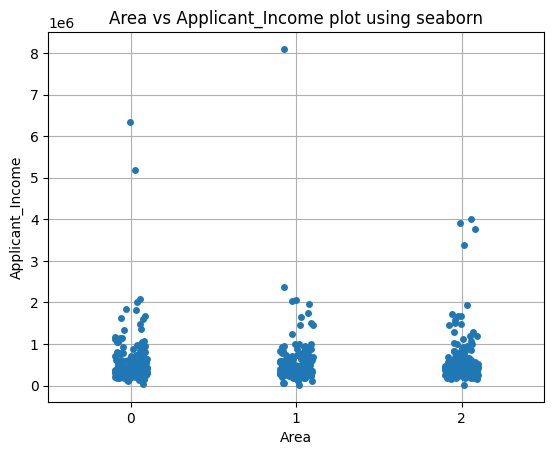

In [47]:
sns.stripplot(x='Area',y='Applicant_Income',data=data)#ploting
plt.title("Area vs Applicant_Income plot using seaborn")
plt.grid() #displaying 

* **0** has a range from 0 to 2300000 and has smaller spread and has 2 outliers
* **1** has a range from 0 to 2800000 and has smaller spread and has 1 outliers
* **2** has a range from 0 to 2100000 and has smaller spread and has 4 outliers

### BOXPLOT

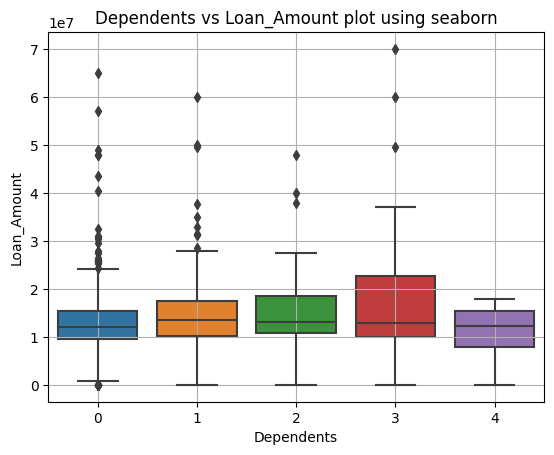

In [43]:
sns.boxplot(x='Dependents',y='Loan_Amount',data=data)#ploting
plt.title("Dependents vs Loan_Amount plot using seaborn")
plt.grid() #displaying 

* **0** min_value is 1000000, max_value is 25000000, range is from 1000000 to 25000000 and median is 13000000
* **1** min_value is 0, max_value is 28000000, range is from 0 to 28000000 and median is 15000000
* **2** min_value is 0, max_value is 27000000, range is from 0 to 27000000 and median is 14500000
* **3** min_value is 0, max_value is 25000000, range is from 0 to 25000000 and median is 13000000


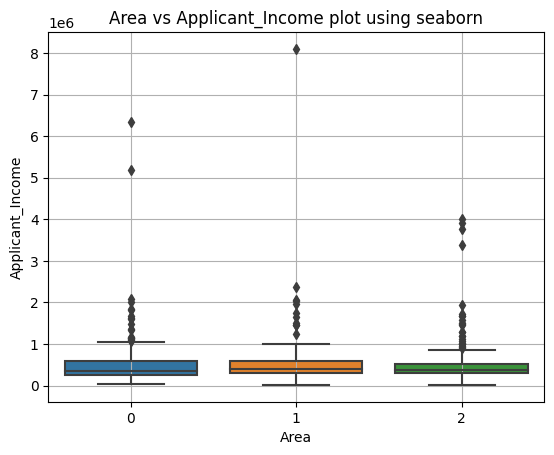

In [46]:
sns.boxplot(x='Area',y='Applicant_Income',data=data)#ploting
plt.title("Area vs Applicant_Income plot using seaborn")
plt.grid() #displaying 

* **0** min_value is 0, max_value is 1100000, range is from 0 to 1100000 and median is 400000
* **1** min_value is 0, max_value is 1000000, range is from 0 to 1000000 and median is 500000
* **2** min_value is 0, max_value is 800000, range is from 0 to 800000 and median is 400000


### VIOLINPLOT

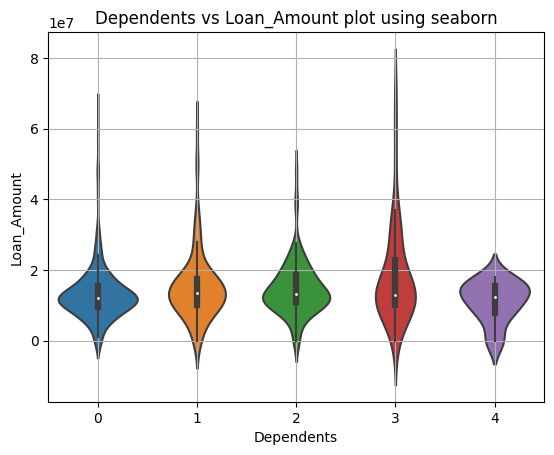

In [44]:
sns.violinplot(x='Dependents',y='Loan_Amount',data=data)#ploting
plt.title("Dependents vs Loan_Amount plot using seaborn")
plt.grid() #displaying 

* Majority of **0** has **Loan_Amount** around 16000000
* Majority of **1** has **Loan_Amount** around 17000000
* Majority of **2** has **Loan_Amount** around 16000000
* Majority of **3** has **Loan_Amount** around 16000000
* Majority of **4** has **Loan_Amount** around 17500000

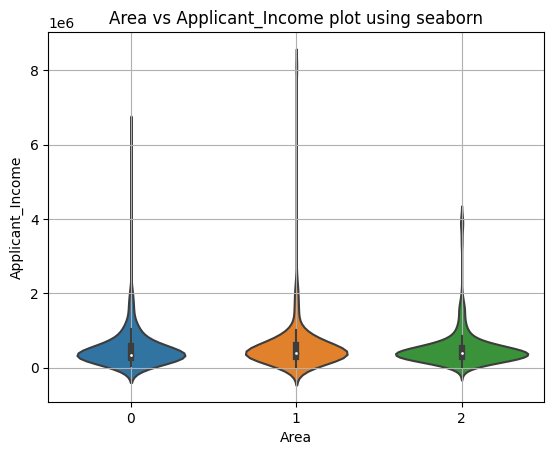

In [45]:
sns.violinplot(x='Area',y='Applicant_Income',data=data)#ploting
plt.title("Area vs Applicant_Income plot using seaborn")
plt.grid() #displaying 

* Majority of **0** has **Applicant_Income** around 100000
* Majority of **1** has **Applicant_Income** around 200000
* Majority of **2** has **Applicant_Income** around 150000


### DISTRIBUTION PLOT

/opt/anaconda3/envs/main/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


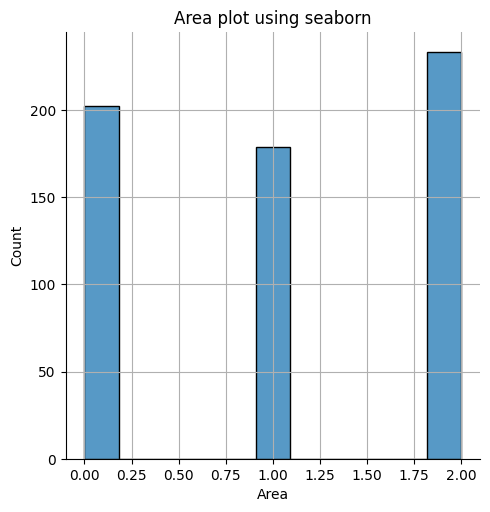

In [77]:
sns.displot(data['Area'])#plotting
plt.title("Area plot using seaborn")
plt.grid() #displaying

* The lowest value of **Area** is 0.00 and highest value is 2.00 and the range lies from 0.00 to 2.00.
* The lowest value of this **Distribution plot** is 175 and peak value is 240


/opt/anaconda3/envs/main/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


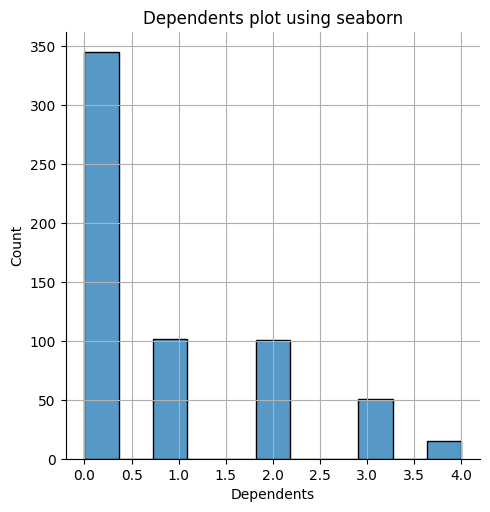

In [78]:
sns.displot(data['Dependents'])#plotting
plt.title("Dependents plot using seaborn")
plt.grid() #displaying

* The lowest value of **Dependents** is 0.0 and highest value is 4.0 and the range lies from 0.0 to 4.0.
* The lowest value of this **Distribution plot** is 20 and peak value is 345




# 2c. FEATURE SELECTION AND FEATURE ENGINEERING

In [44]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

## splitting data into training and testing partitions
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


#scaling the data using standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)# scaling x_train
x_test_scaled = sc.transform(x_test)#scaling x_test

print("[INFO] data preprocessing completed")


[INFO] data preprocessing completed


## Gradient Boosting Classifier

# 3. MODEL TRAINING

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
print("[INFO]model training completed")

[INFO]model training completed


# 4. MODEL EVALUATION

In [46]:
#making the model predict output for x_test
y_predicted = gbk.predict(x_test)

#taking actual value
y_actual = y_test


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import math

accuracy = accuracy_score(y_actual,y_predicted)
print(f"accuracy of given model is:{accuracy}")

precision = precision_score(y_actual,y_predicted)
print(f"precision of given model is:{precision}")

recall = recall_score(y_actual,y_predicted)
print(f"recall of given model is:{recall}")

f1 = f1_score(y_actual,y_predicted)
print(f"f1 of given model is:{f1}")



accuracy of given model is:0.8211382113821138
precision of given model is:0.7777777777777778
recall of given model is:0.5675675675675675
f1 of given model is:0.65625


# 5. MODEL IMPLEMENTATION

In [47]:
#USING THE MODEL TO PREDICT OUTPUT FOR NEW INPUT
Gender = int(input("enter Gender :"))
Married = int(input("enter Married :"))
Dependents = int(input("enter Dependents :"))
Education = int(input("enter Education :"))
Self_Employed = int(input("enter Self_Employed:"))
Applicant_Income = float(input("enter Applicant_Income:"))
Coapplicant_Income = float(input("enter Coapplicant_Income:"))
Loan_Amount = float(input("enter Loan_Amount:"))
Term = float(input("enter Term:"))
Credit_History = float(input("enter Credit_History:"))
Area = int(input("enter Area:"))

#storing the user input in a 2-D array
new_user_input = [[Gender, Married, Dependents, Education, Self_Employed, Applicant_Income, Coapplicant_Income, Loan_Amount, Term, Credit_History, Area]]

#scling new user input
new_user_input = sc.transform(new_user_input)

#using model to pridect the output for new input
new_output = gbk.predict(new_user_input)

#output is a number, we will give answer in text
if new_output[0] ==0:
    print("Eligible for loan ")
if new_output[0] ==1:
    print("Not eligible for loan")

enter Gender :0
enter Married :1
enter Dependents :1
enter Education :0
enter Self_Employed:0
enter Applicant_Income:458300
enter Coapplicant_Income:150800.0
enter Loan_Amount:12800000
enter Term:360.0
enter Credit_History:1.0
enter Area:1
Not eligible for loan


In [ ]:
0	0	0	0	0	584900	0.0	15000000	360.0	1.0	0	1
0	1	1	0	0	458300	150800.0	12800000	360.0	1.0	1	1


## Logistic Regression

# 3. MODEL TRAINING

In [74]:
from sklearn.linear_model import LogisticRegression # importing algo
Logreg_model = LogisticRegression(max_iter = 15000) # initialising the algo
Logreg_model.fit(x_train,y_train) # traing the algo on traing partitions

print("[INFO] model training complete..")

[INFO] model training complete..


# 4. MODEL EVALUATION

In [75]:
data_pda = pd.read_csv("/Users/vaishnavikhot/Downloads/card_transdata.csv")
#making the model predict output for x_test
y_predicted = Logreg_model.predict(x_test)

#taking actual value
y_actual = y_test


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import math

accuracy = accuracy_score(y_actual,y_predicted)
print(f"accuracy of given model is:{accuracy}")

precision = precision_score(y_actual,y_predicted)
print(f"precision of given model is:{precision}")

recall = recall_score(y_actual,y_predicted)
print(f"recall of given model is:{recall}")

f1 = f1_score(y_actual,y_predicted)
print(f"f1 of given model is:{f1}")



accuracy of given model is:0.6829268292682927
precision of given model is:0.0
recall of given model is:0.0
f1 of given model is:0.0


/opt/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5. MODEL IMPLEMENTATION

In [76]:
#USING THE MODEL TO PREDICT OUTPUT FOR NEW INPUT

Gender = int(input("enter Gender :"))
Married = int(input("enter Married :"))
Dependents = int(input("enter Dependents :"))
Education = int(input("enter Education :"))
Self_Employed = int(input("enter Self_Employed:"))
Applicant_Income = float(input("enter Applicant_Income:"))
Coapplicant_Income = float(input("enter Coapplicant_Income:"))
Loan_Amount = float(input("enter Loan_Amount:"))
Term = float(input("enter Term:"))
Credit_History = float(input("enter Credit_History:"))

Area = int(input("enter Area:"))


#storing the user input in a 2-D array
new_user_input = [[Gender, Married, Dependents, Education, Self_Employed, Applicant_Income, Coapplicant_Income, Loan_Amount, Term, Credit_History, Area
]]

#scling new user input
new_user_input = sc.transform(new_user_input)


#using model to pridect the output for new input
new_output = Logreg_model.predict(new_user_input)

#output is a number, we will give answer in text
if new_output[0] ==0:
    print("Eligible for loan ")
if new_output[0] == 1:
    print("Not eligible for loan")


enter Gender :0
enter Married :1
enter Dependents :1
enter Education :0
enter Self_Employed:0
enter Applicant_Income:458300
enter Coapplicant_Income:150800.0
enter Loan_Amount:12800000
enter Term:360.0
enter Credit_History:1.0
enter Area:1
Not eligible for loan


In [ ]:
0	0	0	0	0	584900	0.0	15000000	360.0	1.0	0	1
0	1	1	0	0	458300	150800.0	12800000	360.0	1.0	1	1
